In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Day 24: Runge-Kutta Methods

In the previous notebook we considered Euler's Method as a method for constructing an approximate solution to the IVP $\vec{y}' = \vec{F}\left(x, \vec{y}\right)$ where $\vec{y}\left(a\right) = \vec{\alpha}$. Euler's Method used the Taylor Series truncated after the linear term (essentially a tangent line/plane/hyperplane) to construct the approximate solution using piecewise linear components over steps of size $h$. We could construct more precise approximate solutions by keeping additional terms of the Taylor Series before truncating. For example, an $n^{th}$-order method could use the truncated Taylor Series

$$\vec{y}\left(x + h\right) = \vec{y}\left(x\right) + \vec{y}'\left(x\right)h + \frac{1}{2!}\vec{y}''\left(x\right)h^2 + \cdots + \frac{1}{n!}\vec{y}^{\left(n\right)}\left(x\right)h^n$$

The problem with this is that we need to compute, store, and utilize $n$ derivatives of $\vec{y}$ by repeated differentiation of $\vec{y}' = \vec{F}\left(x, \vec{y}\right)$. *Runge-Kutta* methods avoid the need to compute these derivatives.

## Second-Order Runge-Kutta

The derivation/justification for these Runge-Kutta methods is contained in the textbook and involves Taylor Series and vector calculus. The resulting expression for *second-order Runge-Kutta*, however, is fairly intuitive.

$$\vec{y}\left(x + h\right) \approx \vec{y}\left(x\right) + \vec{F}\left(\underbrace{x + \frac{h}{2}}_{\text{Midpoint x}}, \overbrace{\vec{y} + \frac{h}{2}\vec{F}\left(x, \vec{y}\right)}^{\text{Estimated Midpoint y}}\right)h$$

Recalling that $\vec{y}' = \vec{F}\left(x, \vec{y}\right)$, we are essentially stating that the next value of $\vec{y}$ (given a step of size $h$) should be approximately the last known value of $\vec{y}$ plus the "slope" estimated at the expected midpoint over the change region continued over the step of size $h$.

The relationship above is often estimated in steps.

\begin{align*} \vec{K_0} &= h\vec{F}\left(x, \vec{y}\right)\\
\vec{K_1} &= h\vec{F}\left(x + \frac{h}{2}, \vec{y} + \frac{1}{2}\vec{K_0}\right)\\
\vec{y}\left(x + h\right) &\approx \vec{y}\left(x\right) + \vec{K_1}
\end{align*}

The method outlined above is a *second-order* method since the truncated error is $\mathcal{O}\left(h^3\right)$. It is more common to see *fourth-order Runge-Kutta* methods applied because they achieve greater accuracy with less computational effort. We'll implement *fourth-order Runge-Kutta* in the next section.

## Fourth-Order Runge-Kutta

The method for deriving the fourth-order Runge-Kutta method is quite similar to the method for deriving the second-order method which can be seen in the textbook. The differences being that the Taylor Series is truncated after the fourth-degree term and that the algebra and vector calculus are more involved. We'll skip straight to what is widely referred to as *the Runge-Kutta Method*:

\begin{align*} \vec{K_0} &= h\vec{F}\left(x, \vec{y}\right)\\
\vec{K_1} &= h\vec{F}\left(x + \frac{h}{2}, \vec{y} + \frac{\vec{K_0}}{2}\right)\\
\vec{K_2} &= h\vec{F}\left(x + \frac{h}{2}, \vec{y} + \frac{\vec{K_1}}{2}\right)\\
\vec{K_3} &= h\vec{F}\left(x + h, \vec{y} + \vec{K_2}\right)\\
\vec{y}\left(x + h\right) &= \vec{y}\left(x\right) + \frac{1}{6}\left(\vec{K_0} + 2\vec{K_1} + 2\vec{K_2} + \vec{K_3}\right)
\end{align*}

The main drawback of *the Runge-Kutta Method* is that it does not provide an estimate of the error made in approximation of $\vec{y}\left(x + h\right)$. Therefore, choosing an appropriate $h$ is an important part of ensuring that estimates are precise enough.

**Note:** *Adaptive Runge-Kutta* methods do exist and can evaluate the truncation error at each step and can adjust the value of $h$ accordingly. They are computationally more expensive to use though.

For now, let's implement and use the *Runge-Kutta Method* for solving IVPs.

In [ ]:
def RungeKutta4(F, x, y, xStop, h):
  K0 = ___*___
  K1 = ___*___
  K2 = ___*___
  K3 = ___*___

  return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0

def buildSol_RK4(F, x, y, xStop, h):
  X = []
  Y = []
  X.append(___)
  Y.append(___)
  while x < ___:
    h = min(___, ___ - ___)
    y = y + RungeKutta4(___, ___, ___, ___, ___)
    x = ___
    X.append(___)
    Y.append(___)

  return np.array(___), np.array(___)

We'll also include our old Euler's method routine from last time so that we can compare the two.

In [ ]:
def EulerMethod(F, x, y, xStop, h):
  X = []
  Y = []
  X.append(x)
  Y.append(y)

  while x < xStop:
    h = min(h, xStop - x)
    y = y + h*F(x, y)
    x = x + h
    X.append(x)
    Y.append(y)

  return np.array(X), np.array(Y)

**Example:** Use the *fourth-order Runge-Kutta Method* to build an approximate solution to $y' = y\sin\left(x\right)$ subject to $y\left(0\right) = 1$ over the interval $\left[0, 1\right]$ using steps of size $h = 0.1$. Compare your result to the constructed solution using Euler's Method.

> *Solution.*

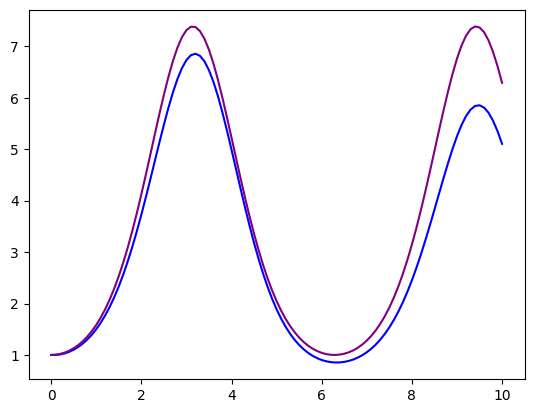

In [ ]:
def F(x, y):
  return y*np.sin(x)

X_euler, Y_euler = EulerMethod(___, ___, ___, ___, ___)
X_RK4, Y_RK4 = buildSol_RK4(___, ___, ___, ___, ___)

plt.plot(X_euler, Y_euler, color = "blue")
plt.plot(X_RK4, Y_RK4, color = "purple")
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.show()

**Example:** Use fourth-order Runge-Kutta to construct a numerical solution to the IVP $y'' = -0.1y' - x$ where $y\left(0\right) = 0$ and $y'\left(0\right) = 1$ along the interval $\left[0, 2\right]$ using increments of size $h = 0.2$.

> *Solution.*

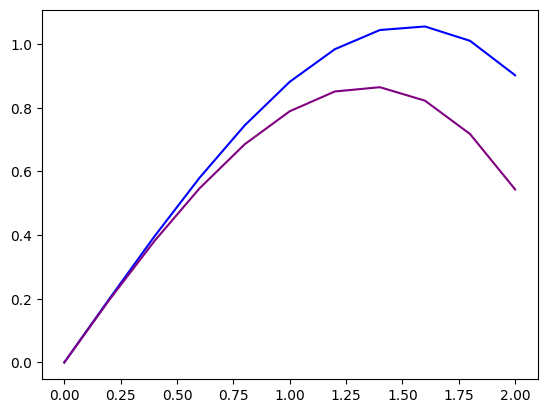

In [ ]:
def F(x, y):
  F_sys = np.zeros(2)
  F_sys[0] = ___
  F_sys[1] = ___

  return F_sys

X_euler, Y_euler = EulerMethod(___, ___, ___, ___, ___)
X_RK4, Y_RK4 = buildSol_RK4(___, ___, ___, ___, ___)

plt.plot(X_euler, Y_euler[:, 0], color = "blue")
plt.plot(X_RK4, Y_RK4[:, 0], color = "purple")
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.show()

In [ ]:
# @title
def F(x, y):
  F = np.zeros(2)
  F[0] = y[1]
  F[1] = -0.1*F[1] - x

  return F

def analytic_sol(x):
  return 100.0*x - 5.0*x**2 + 990.0*(np.exp(-0.1*x) - 1.0)

X, Y = buildSol_RK4(F, 0, [0, 1], 5, h = 0.2)

x_vals = np.linspace(0, 5, 250)
y_vals = analytic_sol(x_vals)

#print("X: ", X)
#print("Y: ", Y)

plt.plot(X, Y[:, 0], color = "green")
plt.scatter(X, Y[:, 0], color = "green")
plt.plot(x_vals, y_vals, color = "purple")
plt.grid()

In the example above, we see that the fourth-order Runge-Kutta method does a great job approximating the analytical solution to our differential equation. This isn't always the case, however. Let's consider another example below.

**Example:** Use the fourth-order Runge-Kutta method to integrate $y' = 3y - 4e^{-x}$ subject to $y\left(0\right) = 1$ on the interval $\left[0, 10\right]$ using steps of size $h = 0.1$. The analytic solution should be $y = e^{-x}$ -- compare your results.

> *Solution.*

We can see that the numerical "solution" diverges spectacularly from the analytical solution. The reason for this is because the general solution to $y' = 3y -4e^{-x}$ is $y = Ce^{3x} + e^{-x}$ and the initial condition $y\left(0\right) = 1$ is what forces $C = 0$. If there is a small error in this determination, say $y = \varepsilon e^{3x} + e^{-x}$ with $\varepsilon \neq 0$, the $\varepsilon e^{3x}$ term becomes the dominant term as $x$ increases and $e^{3x}$ overwhelms $\varepsilon$.

What we've observed here is the phenomenon of *numerical instability* due to small variations in the initial conditions (perhaps due to rounding errors). We cannot blindly trust the results of numerical/computational methods.

### An Applied Example

Let's consider that a spacecraft is launched at an initial altitude of $H = 772$km above sea level and with an initial velocity of $v_0 = 6700$m/s. Given that the Earth is rotating, the differential equations describing the location of the sacecraft are:

$$\left\{\begin{array}{lcl} r'' & = & r\theta'^2 - \frac{GM_{e}}{r^2}\\
\theta'' & = & -\frac{2r'\theta'}{r}\end{array}\right.$$

where $r$ and $\theta$ are the polar coordinates of the spacecraft relative to the center of the Earth. The constants involved in the motion are gravity ($G$), the mass of the Earth ($M_e$), and the radius of the Earth at sea level ($R_e$) defined as follows

$$\begin{array}{lcl} G & = & 6.672\times 10^{-11}\frac{\tt{m}^3}{\tt{kg}\cdot\tt{s}^2}\\
M_e & = & 5.9742\times 10^{24}\tt{kg}\\
R_e & = & 6378.14\tt{km}
\end{array}$$

**Questions:** Derive the equivalent first-order differential equations and initial conditions of the form $\vec{y}' = F\left(t, \vec{y}\right)$ and $\vec{y}\left(0\right) = \vec{b}$ which govern the system described above. Once this is done, use the fourth-order Runge-Kutta Method to integrate the equations from the time of launch until the spacecraft hits the Earth. Determine $\theta$ at the impact site.

> *Solution.*